DATA LOADING AND INSPECTION
---------------

In [1]:
#Importing libraries

#Packages for numeric
import pandas as pd
import numpy as np

#Packages for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report, accuracy_score,log_loss# performance metrics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import metrics

#Classifier module
from sklearn.neural_network import MLPClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data.
telecom = pd.read_csv('tele-churn.csv')

Data Preprocessing
----------
Encoding
-----------------

In [3]:
# Removing the phone number and state column
df1 = telecom.drop(['phone number', 'state', 'area code'], axis=1)

# change categorical data into numerical data
df1['international plan'] = df1['international plan'].map({'no': 0, 'yes': 1})
df1['voice mail plan'] = df1['voice mail plan'].map({'no': 0, 'yes': 1})
df1['churn'] = df1['churn'].map({False : 0, True : 1})

FEATURES SCALING / STANDARDIZATION
--------------------

In [4]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df1[[column]])

# Iterate through numerical columns and scale them
for column in df1.select_dtypes(include=[np.number]).columns:
    df1[[column]] = scaling(column)

In [5]:
# Creating a Test and Train Dataset
y = df1['churn']
X = df1.drop(['churn'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Check the shapes of the split dataprint("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Train set size:", y_train.shape)
print("Test set size:", y_test.shape)

Test set size: (600, 17)
Train set size: (2733,)
Test set size: (600,)


SMOTE
------------

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Resample the training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("\nValue counts of y_train_resampled:\n", y_train_resampled.value_counts())

Shape of X_train_resampled: (4676, 17)

Value counts of y_train_resampled:
 churn
0.0    2338
1.0    2338
Name: count, dtype: int64


 DATA MODELING
-------------

MLP CLASSIFIER (NEURAL NETWORK)
------------------

In [7]:
#Initialize the Gradient Boosting model
mlp =  MLPClassifier(random_state=42)

#Train the model
mlp.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_mlp = mlp.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp)
recall = recall_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp)
auc_roc = roc_auc_score(y_test, y_pred_mlp)
print(f"MLP Classifier Accuracy: {accuracy :.4f}")
print(f"MLP Classifier Precision: {precision :.4f}")
print(f"MLP Classifier recall: {recall :.4f}")
print(f"MLP Classifier f1_score: {f1 :.4f}")
print(f"MLP Classifier auc_roc: {auc_roc:.4f}")
print(classification_report(y_test, y_pred_mlp))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("ROC AUC Score:", roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1]))


print("Training Accuracy :", mlp.score(X_train, y_train))
print("Training Resampled Accuracy :", mlp.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy :", mlp.score(X_test, y_test))

MLP Classifier Accuracy: 0.8850
MLP Classifier Precision: 0.5772
MLP Classifier recall: 0.8068
MLP Classifier f1_score: 0.6730
MLP Classifier auc_roc: 0.8526
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       512
         1.0       0.58      0.81      0.67        88

    accuracy                           0.89       600
   macro avg       0.77      0.85      0.80       600
weighted avg       0.91      0.89      0.89       600

Confusion Matrix:
 [[460  52]
 [ 17  71]]
ROC AUC Score: 0.9171697443181819
Training Accuracy : 0.8840102451518478
Training Resampled Accuracy : 0.886655260906758
Testing Accuracy : 0.885


CONFUSION MATRIX 
---------------------

In [8]:
y_pred_mlp = mlp.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_mlp).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 71
False positives: 52
True negatives: 460
False negatives: 17



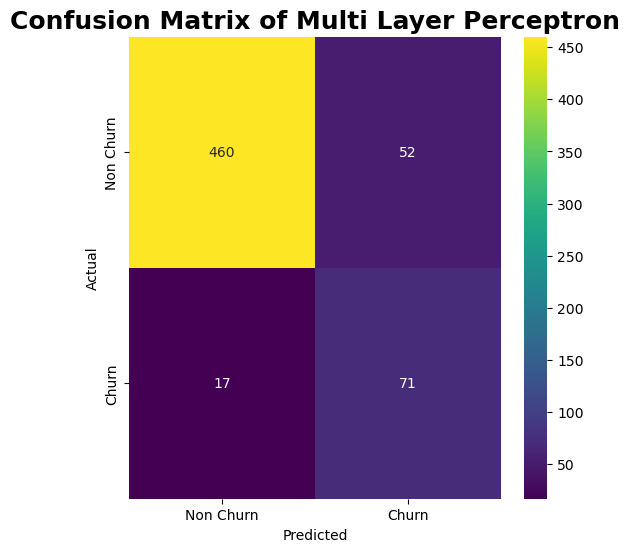

In [9]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred_mlp)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['Non Churn', 'Churn'],
            yticklabels=['Non Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Multi Layer Perceptron', size=18, color='black', fontweight= 'bold')
plt.show()

 EVALUATION OF THE MACHINE LEARNING ALGORITHMS
---------------------

In [10]:
final_data = pd.DataFrame({"ALGORITHMS":["Multi Layer Perceptron"], 
                           "ACCURACY":[accuracy_score(y_test, y_pred_mlp)*100],
                         "PRECISION":[precision_score(y_test, y_pred_mlp)*100],
                          "RECALL":[recall_score(y_test, y_pred_mlp)*100],
                          "F1_SCORE":[f1_score(y_test, y_pred_mlp)*100], 
                            "ROC_AUC":[roc_auc_score(y_test, y_pred_mlp)*100],      
                        })

final_data

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE,ROC_AUC
0,Multi Layer Perceptron,88.5,57.723577,80.681818,67.298578,85.262784


 K_FOLD CROSS VALIDATION
------------------

MLP Classifier model performance with 10 Fold Cross Validation
--------------

ACCURACY
----

In [11]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
mlp_accuracies = cross_val_score(mlp, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(mlp_accuracies)
mlp_avg_accuracy = np.mean(mlp_accuracies)
mlp_std_accuracy = np.std(mlp_accuracies)
print(f"The std score of cross validation using MLP algorithm is {mlp_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using MLP algorithm is {mlp_avg_accuracy * 100:.2f}%")

[0.91025641 0.87393162 0.87179487 0.84401709 0.89529915 0.85683761
 0.88650964 0.88650964 0.88222698 0.87152034]
The std score of cross validation using MLP algorithm is 1.79%
The mean score of cross validation using MLP algorithm is 87.79%


PRECISION
-----

In [12]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
mlp_precision = cross_val_score(mlp, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(mlp_precision)
mlp_avg_precision = np.mean(mlp_precision)
mlp_std_precision = np.std(mlp_precision)
print(f"The std score of cross validation using MLP algorithm is {mlp_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using MLP algorithm is {mlp_avg_precision * 100:.2f}%")

[0.9173913  0.87553648 0.88157895 0.84255319 0.89361702 0.8583691
 0.88135593 0.88135593 0.87447699 0.85365854]
The std score of cross validation using MLP algorithm is 2.01%
The mean score of cross validation using MLP algorithm is 87.60%


RECALL
----

In [13]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
mlp_recall = cross_val_score(mlp, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(mlp_recall)
mlp_avg_recall = np.mean(mlp_recall)
mlp_std_recall = np.std(mlp_recall)
print(f"The std score of cross validation using MLP algorithm is {mlp_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using MLP algorithm is {mlp_avg_recall * 100:.2f}%")

[0.9017094  0.87179487 0.85897436 0.84615385 0.8974359  0.85470085
 0.89270386 0.89270386 0.89316239 0.8974359 ]
The std score of cross validation using MLP algorithm is 1.97%
The mean score of cross validation using MLP algorithm is 88.07%


F1_SCORE
----

In [14]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
mlp_f1 = cross_val_score(mlp, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')
print(mlp_f1)
mlp_avg_f1= np.mean(mlp_f1)
mlp_std_f1 = np.std(mlp_f1)
print(f"The std score of cross validation using MLP algorithm is {mlp_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using MLP algorithm is {mlp_avg_f1 * 100:.2f}%")

[0.90948276 0.87366167 0.87012987 0.84434968 0.89552239 0.85653105
 0.8869936  0.8869936  0.88372093 0.875     ]
The std score of cross validation using MLP algorithm is 1.78%
The mean score of cross validation using MLP algorithm is 87.82%


CHECKING IF IT IS OVERFITTING OR NOT
-------

In [15]:
if mlp_avg_accuracy > accuracy:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test accuracy")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test accuracy")

Model might be overfitting: Cross validation accuracy is lower than test accuracy


In [16]:
if mlp_avg_precision > precision:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test precision")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test precision")

Model generalizes well: Cross_validation accuracy is higher or close to test precision


In [17]:
if mlp_avg_recall > recall:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test recall")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test recall")

Model generalizes well: Cross_validation accuracy is higher or close to test recall


In [18]:
if mlp_avg_f1 > f1:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test f1_score")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test f1_score")

Model generalizes well: Cross_validation accuracy is higher or close to test f1_score


Total KFold Validation
--------------

In [19]:
final_kfold = pd.DataFrame({"ALGORITHMS":["Multi Layer Perceptron"], 
                           "ACCURACY":[mlp_avg_accuracy * 100],
                         "PRECISION":[mlp_avg_precision * 100],
                          "RECALL":[mlp_avg_recall * 100],
                          "F1_SCORE":[mlp_avg_f1 * 100],  
                           
                        })
final_kfold

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE
0,Multi Layer Perceptron,87.789033,87.598934,88.067752,87.823856
